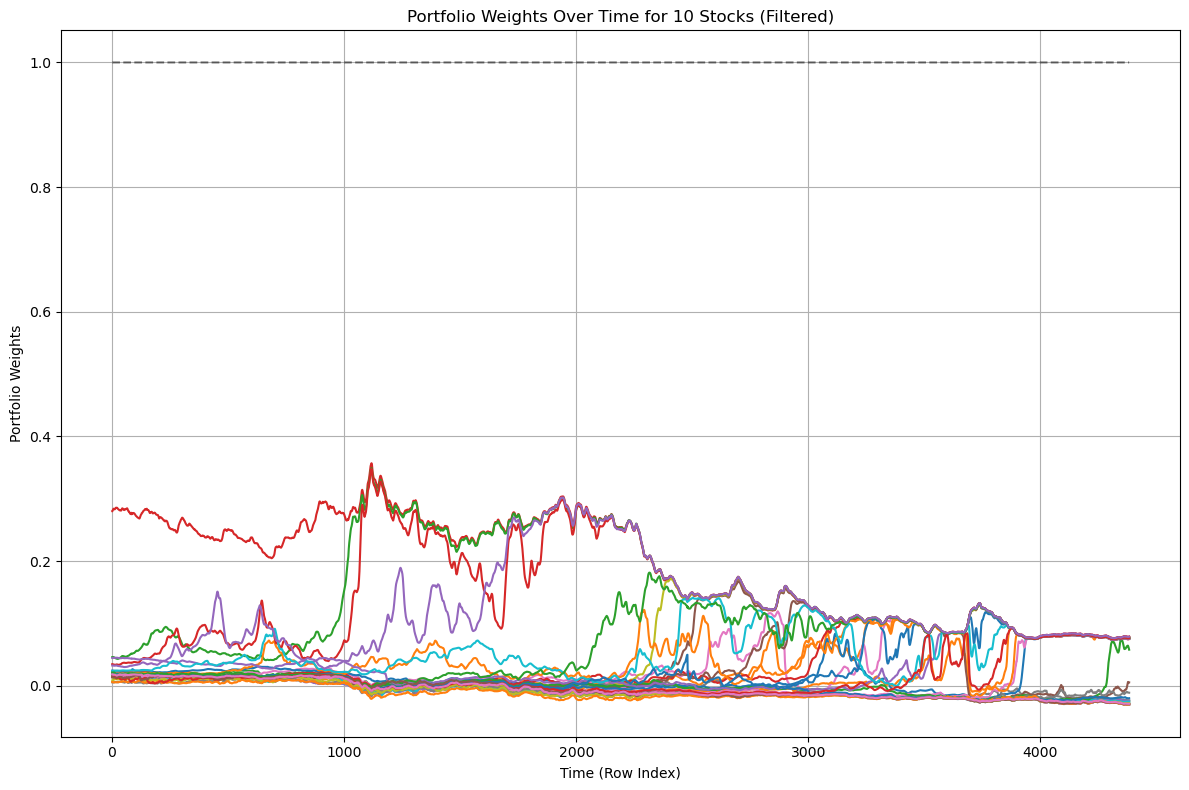

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the portfolio weights from the CSV file
file_path = r'C:\Users\Kartik\MTP-Work\results\portfolio_weights_full.csv'
#file_path = r'/Users/pranayvij/MTP-Work/results/portfolio_weights_full.csv'

portfolio_weights = pd.read_csv(file_path, header=None)

# Replace infinite values and NaNs with 0
portfolio_weights = portfolio_weights.replace([np.inf, -np.inf], np.nan).fillna(0)

# Exclude the first timestamp by slicing from the second row onward
portfolio_weights = portfolio_weights.iloc[1:].reset_index(drop=True)

# Define a threshold to identify and exclude rows with extreme values
extreme_threshold = 1000
extreme_rows = (portfolio_weights.abs() > extreme_threshold).any(axis=1)

# Filter out rows where weights are too extreme
filtered_weights = portfolio_weights[~extreme_rows].reset_index(drop=True)

# Calculate row sums to check if weights sum to 1
row_sums = filtered_weights.sum(axis=1)
if not np.allclose(row_sums, 1, atol=0.01):
    print("Warning: Portfolio weights do not sum to 1 at some timesteps.")

# Generate x-axis values for each valid timestep
x_values = range(1, len(filtered_weights) + 1)

# Plot the portfolio weights for all stocks
plt.figure(figsize=(12, 8))
for i in range(filtered_weights.shape[1]):
    plt.plot(x_values, filtered_weights.iloc[:, i], label=f'Stock {i+1}')

# Plot the row sums to verify the weights' sum behavior over time
plt.plot(x_values, row_sums, label="Sum of Weights", linestyle="--", color="black", alpha=0.5)


# Customize plot appearance
plt.xlabel('Time (Row Index)')
plt.ylabel('Portfolio Weights')
plt.title('Portfolio Weights Over Time for 10 Stocks (Filtered)')
#plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


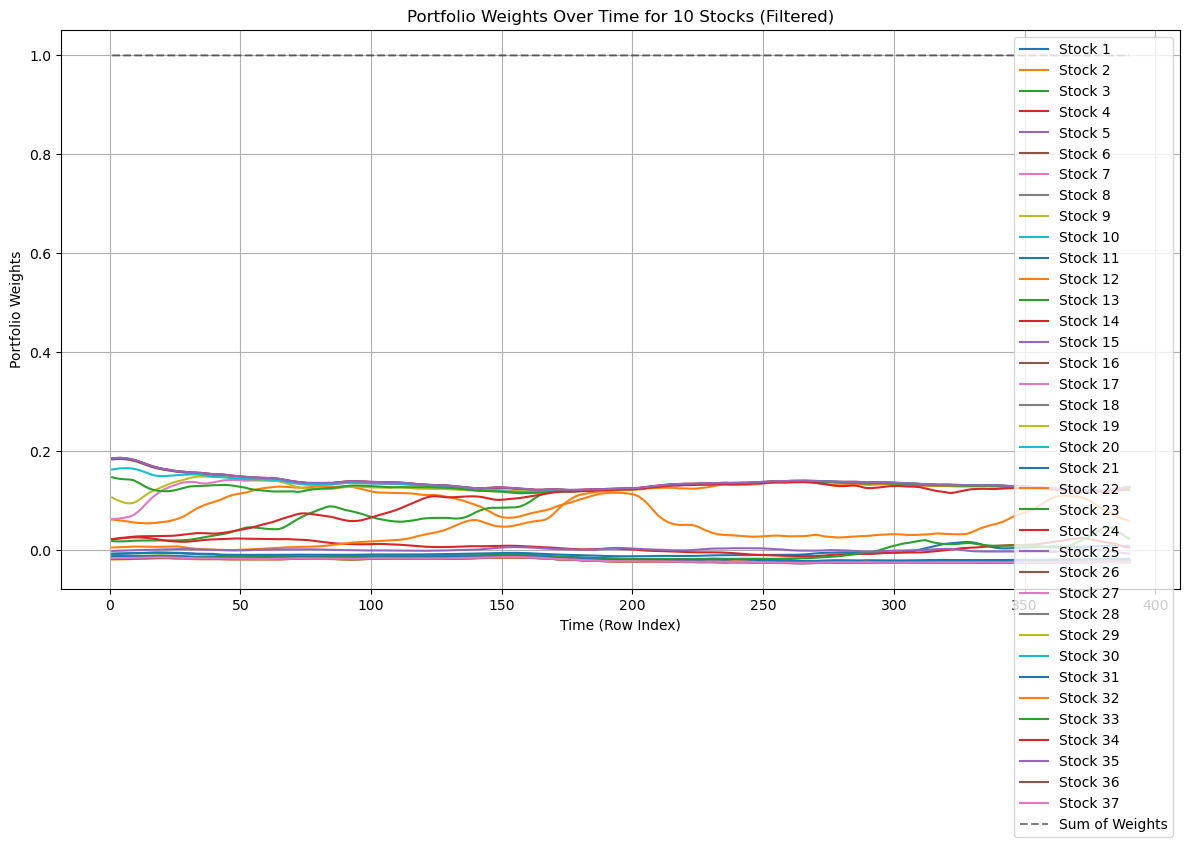

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the portfolio weights from the CSV file
file_path = r'C:\Users\Kartik\MTP-Work\results\test_portfolio_weights.csv'
#file_path = r'/Users/pranayvij/MTP-Work/results/test_portfolio_weights.csv'

portfolio_weights = pd.read_csv(file_path, header=None)

# Replace infinite values and NaNs with 0
portfolio_weights = portfolio_weights.replace([np.inf, -np.inf], np.nan).fillna(0)

# Exclude the first timestamp by slicing from the second row onward
portfolio_weights = portfolio_weights.iloc[1:].reset_index(drop=True)

# Define a threshold to identify and exclude rows with extreme values
extreme_threshold = 1000
extreme_rows = (portfolio_weights.abs() > extreme_threshold).any(axis=1)

# Filter out rows where weights are too extreme
filtered_weights = portfolio_weights[~extreme_rows].reset_index(drop=True)

# Calculate row sums to check if weights sum to 1
row_sums = filtered_weights.sum(axis=1)
if not np.allclose(row_sums, 1, atol=0.01):
    print("Warning: Portfolio weights do not sum to 1 at some timesteps.")

# Generate x-axis values for each valid timestep
x_values = range(1, len(filtered_weights) + 1)

# Plot the portfolio weights for all stocks
plt.figure(figsize=(12, 8))
for i in range(filtered_weights.shape[1]):
    plt.plot(x_values, filtered_weights.iloc[:, i], label=f'Stock {i+1}')

# Plot the row sums to verify the weights' sum behavior over time
plt.plot(x_values, row_sums, label="Sum of Weights", linestyle="--", color="black", alpha=0.5)


# Customize plot appearance
plt.xlabel('Time (Row Index)')
plt.ylabel('Portfolio Weights')
plt.title('Portfolio Weights Over Time for 10 Stocks (Filtered)')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
